In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

import pymc3 as pm

In [145]:
features = tfp.distributions.Normal(loc=0., scale=1.).sample(int(100e3))

In [147]:
def sr(neco):
    with tf.Session() as sess:
        return sess.run(neco)

In [160]:
prior = tfp.distributions.Beta([0.1, 0.1])
mince = tfp.distributions.Bernoulli(probs=prior)

plt.hist(sr(mince.sample(100000)))

ValueError: None values not supported.

In [26]:
import tensorflow as tf
import tensorflow_probability as tfp

# Pretend to load synthetic data set.
features = tfp.distributions.Normal(loc=0., scale=1.).sample(int(100e3))
labels = tfp.distributions.Bernoulli(logits=1.618 * features).sample()

# Specify model.
model = tfp.glm.Bernoulli()

# Fit model given data.
coeffs, linear_response, is_converged, num_iter = tfp.glm.fit(
    model_matrix=features[:, tf.newaxis],
    response=tf.to_float(labels),
    model=model)
# ==> coeffs is approximately [1.618] (We're golden!)

In [29]:
from tensorflow_probability import edward2 as ed

normal_rv = ed.Normal(loc=0., scale=1.)

## <ed.RandomVariable 'Normal/' shape=() dtype=float32>
normal_rv.distribution.log_prob(1.231)
## <tf.Tensor 'Normal/log_prob/sub:0' shape=() dtype=float32>

dirichlet_rv = ed.Dirichlet(concentration=tf.ones([2, 10]))

In [162]:
prior = ed.Beta(concentration0=0.1, concentration1=0.1)

mince = ed.Bernoulli(probs=prior)

(array([48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

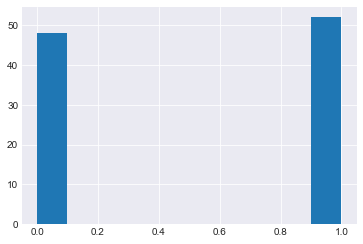

In [167]:
plt.hist([sr(mince) for _ in range(100)])

In [30]:
def logistic_regression(features):
  """Bayesian logistic regression p(y | x) = int p(y | x, w, b) p(w, b) dwdb."""
  coeffs = ed.Normal(loc=tf.zeros(features.shape[1]), scale=1., name="coeffs")
  intercept = ed.Normal(loc=0., scale=1., name="intercept")
  outcomes = ed.Bernoulli(
      logits=tf.tensordot(features, coeffs, [[1], [0]]) + intercept,
      name="outcomes")
  return outcomes

num_features = 10
features = tf.random_normal([100, num_features])
outcomes = logistic_regression(features)

# Execute the model program, returning a sample np.ndarray of shape (100,).
with tf.Session() as sess:
  outcomes_ = sess.run(outcomes)

In [31]:
outcomes_

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [40]:
with tf.Session() as sess:
    print(sess.run(dirichlet_rv))

[[0.13127664 0.02718331 0.10051946 0.02631495 0.27520004 0.05705252
  0.0647105  0.03206873 0.26251915 0.02315471]
 [0.05045919 0.0979283  0.08710035 0.04668044 0.14887658 0.13480064
  0.13434866 0.09507336 0.04492804 0.15980445]]


In [45]:
dirichlet_rv = ed.Dirichlet(concentration=tf.constant([0.1, 0.1]))

In [48]:
with tf.Session() as sess:
    
    print(sess.run(dirichlet_rv))

[0.99554193 0.0044581 ]


In [ ]:
tfp.mcmc.sample_chain(1000, )

In [65]:
import torch

import pyro
import pyro.infer
import pyro.infer.mcmc
import pyro.infer.mcmc.hmc

import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim

In [136]:
slova = dist.Dirichlet(torch.tensor([.1, .9]))

In [137]:
pyro.sample("slova", slova)

tensor([0.5007, 0.4993])

In [138]:
posterior = infer.Importance(slova, num_samples = 10000)
marginal = infer.EmpiricalMarginal(posterior.run())

In [139]:
data = np.array([marginal().numpy() for _ in range(10000)])

([array([7739.,  591.,  373.,  265.,  230.,  183.,  169.,  168.,  122.,
          160.]),
  array([ 160.,  122.,  168.,  169.,  183.,  230.,  265.,  373.,  591.,
         7739.])],
 array([1.1920900e-07, 1.0000010e-01, 2.0000008e-01, 3.0000004e-01,
        4.0000004e-01, 5.0000000e-01, 5.9999996e-01, 6.9999993e-01,
        7.9999995e-01, 8.9999992e-01, 9.9999988e-01], dtype=float32),
 <a list of 2 Lists of Patches objects>)

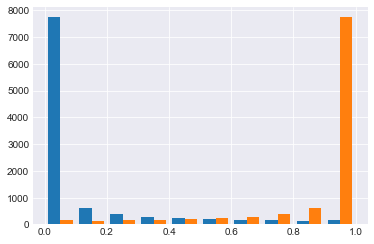

In [141]:
plt.hist(data)

In [85]:
plt.hist(data, range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#");

ValueError: only one element tensors can be converted to Python scalars

In [168]:
model = pm.Model()

with model:
    prior = pm.Beta("hovinko", alpha=0.1, beta=0.1)
    mince = pm.Bernoulli("mince", p=prior)
    
#     prior = pm.Dirichlet("prior", a=np.array([0.1, 0.1, 0.1]))
# #     theta=pm.Dirichlet('theta', [0.1, 0.1, 0.1],shape=(3,4))  
#     slova = pm.Categorical("slova", prior)
    
    trace = pm.sample(100)

C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
C:\dev\Miniconda3\lib\site-packages\theano\gof\cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = dis

C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
C:\dev\Miniconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

(array([259.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 141.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

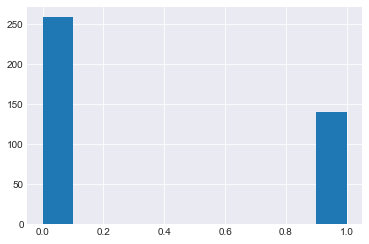

In [170]:
plt.hist(trace["mince"])